# Forecasting Energy consumption

## 1. Business problem
Optimize the Electricity energy generation so that it helps in comprehensive planning,
operation, management, cascade utilization of energy systems and to promote the energy market.

### Business objective
Forecaste the Electricity energy consumption demand for the coming months using historical data of monthly electricity consumption

### Forecast duration
Next 3 years

In [1]:
import os
os.chdir(r"D:\Datascience\Analytics vidya\LabAV\week 22 Time series Forecasting Energy consumption")

In [2]:
os.listdir()

['energy consumption.csv', 'energyconsumption-201002-134452.zip']

In [3]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

from sklearn.metrics import mean_squared_error
from math import sqrt
from statistics import mean 

import warnings
warnings.filterwarnings("ignore")

In [4]:
data = pd.read_csv("energy consumption.csv")
print(data.shape)
data.head()

(969, 2)


,DATE,ENERGY_INDEX
0,01/1939,3.3842
1,02/1939,3.4100
2,03/1939,3.4875
3,04/1939,3.5133
4,05/1939,3.5133


In [5]:
data.tail()

,DATE,ENERGY_INDEX
964,05/2019,91.9046
965,06/2019,98.4397
966,07/2019,112.9469
967,08/2019,111.6645
968,09/2019,102.2911


In [6]:
data.dtypes

DATE             object
ENERGY_INDEX    float64
dtype: object

In [7]:
data.isna().sum() #number of missing values

DATE            0
ENERGY_INDEX    0
dtype: int64

This is a Univariate Time-series problem

### 2. Required Preprocessing 

In [8]:
data['DATE'] =  pd.to_datetime(data['DATE'],format="%m/%Y")
data.index = data['DATE'] #set date as index
data.head()

,DATE,ENERGY_INDEX
DATE,,
1939-01-01,1939-01-01,3.3842
1939-02-01,1939-02-01,3.4100
1939-03-01,1939-03-01,3.4875
1939-04-01,1939-04-01,3.5133
1939-05-01,1939-05-01,3.5133


## 3. Data exploration

In [9]:
### Check for Missing Values

In [10]:
data.DATE.min(), data.DATE.max()

(Timestamp('1939-01-01 00:00:00'), Timestamp('2019-09-01 00:00:00'))

In [11]:
data['DATE'].max() - data['DATE'].min()

Timedelta('29463 days 00:00:00')

Roughly 80 years of data

### 3.1 Visualizing the time series.


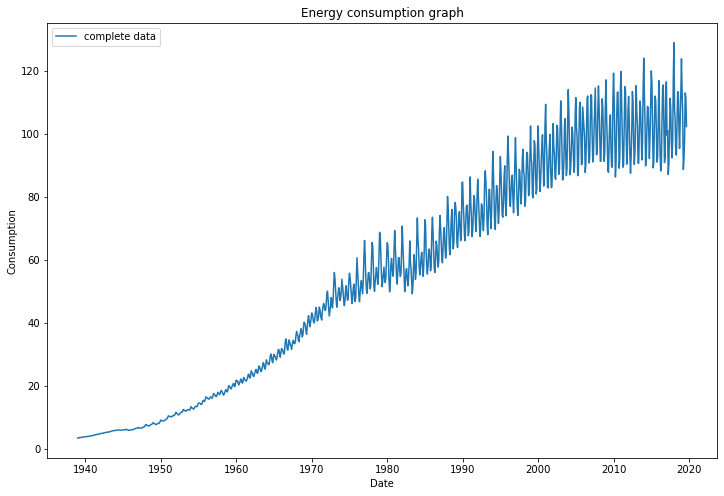

In [12]:
plt.figure(figsize=(12,8))
plt.xlabel("Date")
plt.ylabel("Consumption")
plt.title("Energy consumption graph")
plt.plot(data.index, data['ENERGY_INDEX'], label='complete data' )
plt.legend(loc='best')
plt.show()


In [13]:
data.describe()

,ENERGY_INDEX
count,969.000000
mean,54.657608
std,35.455379
min,3.384200
25%,19.581700
50%,54.763700
75%,87.729300
max,128.907100


In [14]:
data.head()

,DATE,ENERGY_INDEX
DATE,,
1939-01-01,1939-01-01,3.3842
1939-02-01,1939-02-01,3.4100
1939-03-01,1939-03-01,3.4875
1939-04-01,1939-04-01,3.5133
1939-05-01,1939-05-01,3.5133


### 2. Feature extraction

In [15]:
data_feat = pd.DataFrame({"year": data['DATE'].dt.year,
                          "quarter": data['DATE'].dt.quarter,
                          "month": data['DATE'].dt.month,
                          "day": data['DATE'].dt.day,
                          "week": data['DATE'].dt.week,
                          "dayofyear": data['DATE'].dt.dayofyear,
                          "weekday": data['DATE'].dt.dayofweek,
                         })
data_feat.head()

,year,quarter,month,day,week,dayofyear,weekday
DATE,,,,,,,
1939-01-01,1939,1,1,1,52,1,6
1939-02-01,1939,1,2,1,5,32,2
1939-03-01,1939,1,3,1,9,60,2
1939-04-01,1939,2,4,1,13,91,5
1939-05-01,1939,2,5,1,18,121,0


In [16]:
complete_data = pd.concat([data_feat, data['ENERGY_INDEX']], axis=1)
complete_data.head()

,year,quarter,month,day,week,dayofyear,weekday,ENERGY_INDEX
DATE,,,,,,,,
1939-01-01,1939,1,1,1,52,1,6,3.3842
1939-02-01,1939,1,2,1,5,32,2,3.4100
1939-03-01,1939,1,3,1,9,60,2,3.4875
1939-04-01,1939,2,4,1,13,91,5,3.5133
1939-05-01,1939,2,5,1,18,121,0,3.5133


----

- We have the monthly level data. 
-Let us find out if there is any pattern in the data. 

    - Is the ENERGY_INDEX high on any particular day of the week ? 
        - Will the weekend have any effect on the ENERGY_INDEX ?

    - Is the ENERGY_INDEX higher/ lower on particular months of the year ?
    - How is the ENERGY_INDEX changing over the years? Is it increasing or decreasing or constant ?

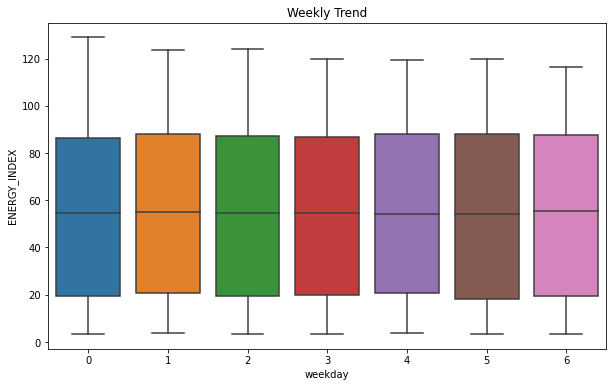

In [17]:
# boxplot for week's ENERGY_INDEX
plt.figure(figsize=(10,6))

sns.boxplot(x=complete_data['weekday'], y=complete_data['ENERGY_INDEX'], )
plt.title('Weekly Trend')
plt.show()

- The ENERGY_INDEX is same throughout the week
- Weekend have no effect on the ENERGY_INDEX

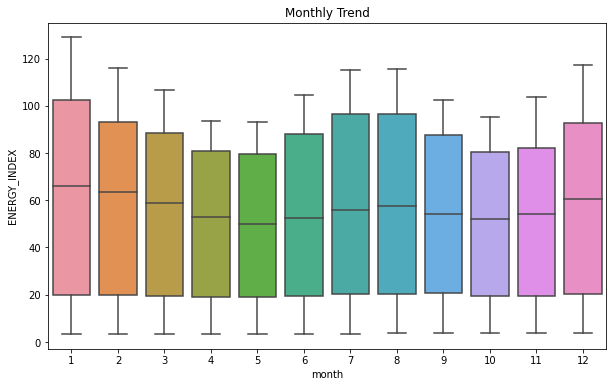

In [18]:
# boxplot for month's ENERGY_INDEX
plt.figure(figsize=(10,6))

sns.boxplot(x=complete_data['month'], y=complete_data['ENERGY_INDEX'], )
plt.title('Monthly Trend')
plt.show()

- ENERGY_INDEX is higher on first, middle and last months

In [19]:
# Let's check the average for each quarter

In [20]:
quarter_average = pd.DataFrame(complete_data.groupby('quarter')['ENERGY_INDEX'].mean())
quarter_average

,ENERGY_INDEX
quarter,
1,58.127037
2,50.794960
3,56.527812
4,53.162160


- 1st and 3rd Quarter had comparatively more ENERGY_INDEX than other quarters

In [21]:
# Let's check the average ENERGY_INDEX for each year.

<AxesSubplot:xlabel='year'>

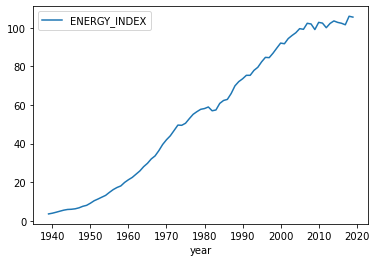

In [22]:
yearly_average = pd.DataFrame(complete_data.groupby('year')['ENERGY_INDEX'].mean())
yearly_average.plot()

 - ENERGY_INDEX is increasing over the years

## Summary:
- The ENERGY_INDEX is same throughout the week
- Weekend have no effect on the ENERGY_INDEX
- ENERGY_INDEX is higher on first, middle and last months
- 1st and 3rd Quarter had comparatively more ENERGY_INDEX than other quarters
- ENERGY_INDEX is increasing over the years

## Model Building 

### Hold-out Validation

In [23]:
(data.shape)

(969, 2)

In [24]:
train_data = data[:679] # 70% of data
valid_data = data[679:] # 30% of data

In [25]:
print(train_data.shape), print(valid_data.shape)

(679, 2)
(290, 2)


(None, None)

In [26]:
train_data.tail()

,DATE,ENERGY_INDEX
DATE,,
1995-03-01,1995-03-01,81.5205
1995-04-01,1995-04-01,74.0457
1995-05-01,1995-05-01,73.5003
1995-06-01,1995-06-01,78.5503
1995-07-01,1995-07-01,86.2425


In [27]:
valid_data.head()

,DATE,ENERGY_INDEX
DATE,,
1995-08-01,1995-08-01,89.8063
1995-09-01,1995-09-01,78.7442
1995-10-01,1995-10-01,73.9353
1995-11-01,1995-11-01,79.8903
1995-12-01,1995-12-01,91.0933


In [28]:
valid_data.tail()

,DATE,ENERGY_INDEX
DATE,,
2019-05-01,2019-05-01,91.9046
2019-06-01,2019-06-01,98.4397
2019-07-01,2019-07-01,112.9469
2019-08-01,2019-08-01,111.6645
2019-09-01,2019-09-01,102.2911


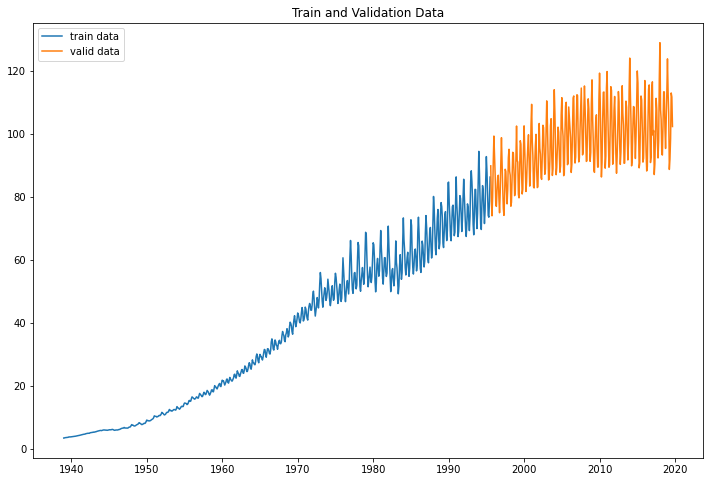

In [29]:
plt.figure(figsize=(12,8))

plt.plot(train_data.index, train_data['ENERGY_INDEX'], label='train data')
plt.plot(valid_data.index, valid_data['ENERGY_INDEX'], label='valid data')

plt.legend(loc='best')
plt.title("Train and Validation Data")
plt.show()

# Naive Model
Using the last (most recent) value of train as the predictions

In [30]:
train_data.DATE.min(), train_data.DATE.max()

(Timestamp('1939-01-01 00:00:00'), Timestamp('1995-07-01 00:00:00'))

In [31]:
valid_data.DATE.min(), valid_data.DATE.max()

(Timestamp('1995-08-01 00:00:00'), Timestamp('2019-09-01 00:00:00'))

In [32]:
print(train_data.shape)
train_data.tail()

(679, 2)


,DATE,ENERGY_INDEX
DATE,,
1995-03-01,1995-03-01,81.5205
1995-04-01,1995-04-01,74.0457
1995-05-01,1995-05-01,73.5003
1995-06-01,1995-06-01,78.5503
1995-07-01,1995-07-01,86.2425


In [33]:
# indexing starts from 0
train_data['ENERGY_INDEX'][678]

86.2425

In [34]:
# Defining predictions for validation
valid_data['naive'] = train_data['ENERGY_INDEX'][678]

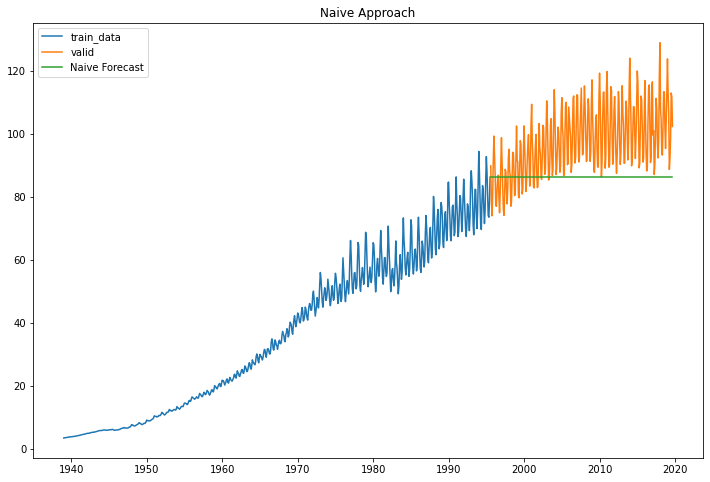

In [35]:
plt.figure(figsize=(12,8))

plt.plot(train_data.index, train_data['ENERGY_INDEX'], label='train_data')
plt.plot(valid_data.index,valid_data['ENERGY_INDEX'], label='valid')
plt.plot(valid_data.index,valid_data['naive'], label='Naive Forecast')
plt.legend(loc='best')
plt.title("Naive Approach")
plt.show()

In [36]:
# calculating RMSE 
rmse = sqrt(mean_squared_error(valid_data['ENERGY_INDEX'], valid_data['naive']))
print('The RMSE value for Naive Approach is', rmse)

The RMSE value for Naive Approach is 15.566631190440877


-------

# Simple Average

In [37]:
train_data['ENERGY_INDEX'].mean() #Taking average of the complete data

36.37047805596465

In [38]:
# Defining predictions for validation
valid_data['average_complete'] = train_data['ENERGY_INDEX'].mean()

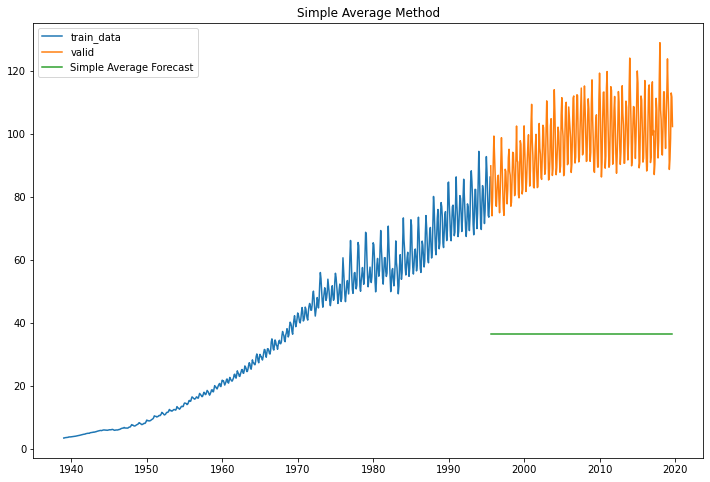

In [39]:
plt.figure(figsize=(12,8))

plt.plot(train_data.index, train_data['ENERGY_INDEX'], label='train_data')
plt.plot(valid_data.index,valid_data['ENERGY_INDEX'], label='valid')
plt.plot(valid_data.index,valid_data['average_complete'], label='Simple Average Forecast')
plt.legend(loc='best')
plt.title("Simple Average Method")
plt.show()

In [40]:
# calculating RMSE 
rmse = sqrt(mean_squared_error(valid_data['ENERGY_INDEX'], valid_data['average_complete']))
print('The RMSE value for Simple Approach is', rmse)

The RMSE value for Simple Approach is 62.047442397963096


The initial values in the train data are smaller. Instead of taking the average of the complete data, we are taking the average of only the recent 12 values in order to make the predictions. 

In [41]:
train_data.tail(12)

,DATE,ENERGY_INDEX
DATE,,
1994-08-01,1994-08-01,82.1321
1994-09-01,1994-09-01,75.9181
1994-10-01,1994-10-01,71.4802
1994-11-01,1994-11-01,75.4754
1994-12-01,1994-12-01,85.0772
1995-01-01,1995-01-01,92.7412
1995-02-01,1995-02-01,87.6670
1995-03-01,1995-03-01,81.5205
1995-04-01,1995-04-01,74.0457


In [42]:
temp = (train_data['ENERGY_INDEX'][667:679]).values
print('Last year values are:', temp)
print('Average for last 12 months is', temp.mean())

Last year values are: [82.1321 75.9181 71.4802 75.4754 85.0772 92.7412 87.667  81.5205 74.0457
 73.5003 78.5503 86.2425]
Average for last 12 months is 80.36254166666667


In [43]:
# Defining predictions for validation
valid_data['average_lastyear'] = temp.mean()

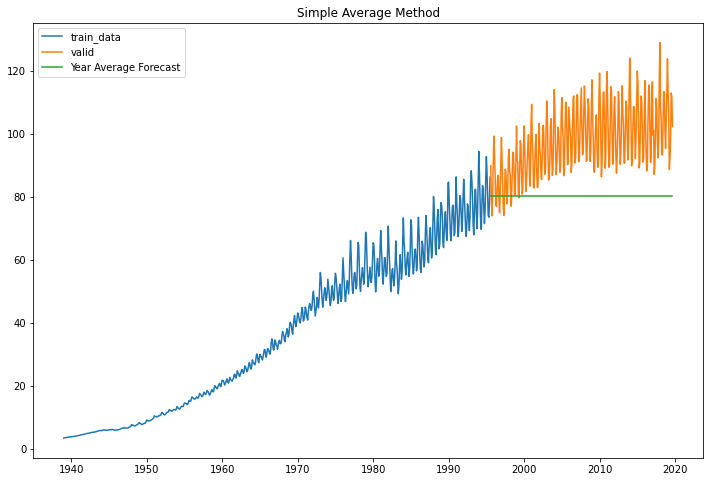

In [44]:
plt.figure(figsize=(12,8))

plt.plot(train_data.index, train_data['ENERGY_INDEX'], label='train_data')
plt.plot(valid_data.index,valid_data['ENERGY_INDEX'], label='valid')
plt.plot(valid_data.index,valid_data['average_lastyear'], label='Year Average Forecast')
plt.legend(loc='best')
plt.title("Simple Average Method")
plt.show()

In [45]:
# calculating RMSE 
rmse = sqrt(mean_squared_error(valid_data['ENERGY_INDEX'], valid_data['average_lastyear']))
print('The RMSE value for Simple Approach is', rmse)

The RMSE value for Simple Approach is 20.223348559906057


----

# Moving Average

In [46]:
# list holding last 12 values

valid_data['moving_average'] = 0
month_values = list(temp)

In [47]:
for i in range(0,len(valid_data)):
    end = len(month_values)
    start = len(month_values)-12
    pred = mean(month_values[start:end])
    
    valid_data['moving_average'][i] = pred
    month_values.append(pred)

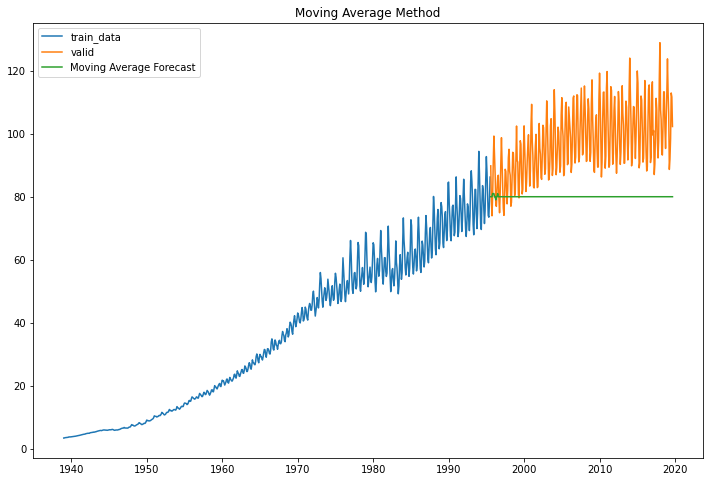

In [48]:
plt.figure(figsize=(12,8))

plt.plot(train_data.index, train_data['ENERGY_INDEX'], label='train_data')
plt.plot(valid_data.index,valid_data['ENERGY_INDEX'], label='valid')
plt.plot(valid_data.index,valid_data['moving_average'], label='Moving Average Forecast')
plt.legend(loc='best')
plt.title("Moving Average Method")
plt.show()

In [49]:
# calculating RMSE 
rmse = sqrt(mean_squared_error(valid_data['ENERGY_INDEX'], valid_data['moving_average']))
print('The RMSE value for Moving Approach is', rmse)

The RMSE value for Moving Approach is 20.52489223354211


----

# Weighted Moving Average


In [50]:
# list holding last 12 values and weights

month_values = train_data['ENERGY_INDEX'][667:679].values
month_values = month_values.tolist()

weights = []
for i in range(1,13):
    W = i/13
    weights.append(W)

In [51]:
len(month_values), len(weights)

(12, 12)

In [52]:
valid_data['weighted_moving_average'] = 0

In [53]:
for i in range(0,len(valid_data)):
    
    end = len(month_values)
    start = len(month_values)-12
    
    final_values = month_values[start:end]
    
    weighted_mean = 0
    for j, k in zip(weights,final_values):
        weighted_mean += j*k
        
    weighted_mean = weighted_mean/sum(weights)
        
    valid_data['weighted_moving_average'][i] = weighted_mean
    month_values.append(weighted_mean)

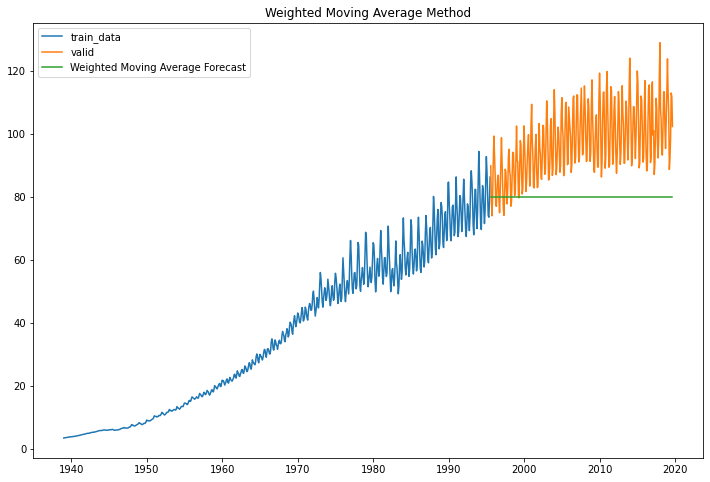

In [54]:
plt.figure(figsize=(12,8))

plt.plot(train_data.index, train_data['ENERGY_INDEX'], label='train_data')
plt.plot(valid_data.index,valid_data['ENERGY_INDEX'], label='valid')
plt.plot(valid_data.index,valid_data['weighted_moving_average'], label='Weighted Moving Average Forecast')
plt.legend(loc='best')
plt.title("Weighted Moving Average Method")
plt.show()

In [55]:
# calculating RMSE 
rmse = sqrt(mean_squared_error(valid_data['ENERGY_INDEX'], valid_data['weighted_moving_average']))
print('The RMSE value for Weighted Moving Approach is', rmse)

The RMSE value for Weighted Moving Approach is 20.531025668281178


## Summary:

- Naive Model : 86.2425 is the predicted ENERGY_INDEX for next 3 years. The RMSE value for Naive Approach is 15.566631190440877

- Simple Average: 36.370478 is the predicted ENERGY_INDEX for next 3 years. The RMSE value for Simple Approach is 62.047442397963096.

- Average for last 12 months is 80.36254166666667. The RMSE value for Simple Approach is 20.223348559906057

- Moving Average
80 is the predicted ENERGY_INDEX for next 3 years. The RMSE value for Moving Approach is 20.527017415034702

- Weighted Moving Average
converges to  80.74813205128204. The RMSE value for Weighted Moving Approach is 20.531025668281178


----

# Time Series- components

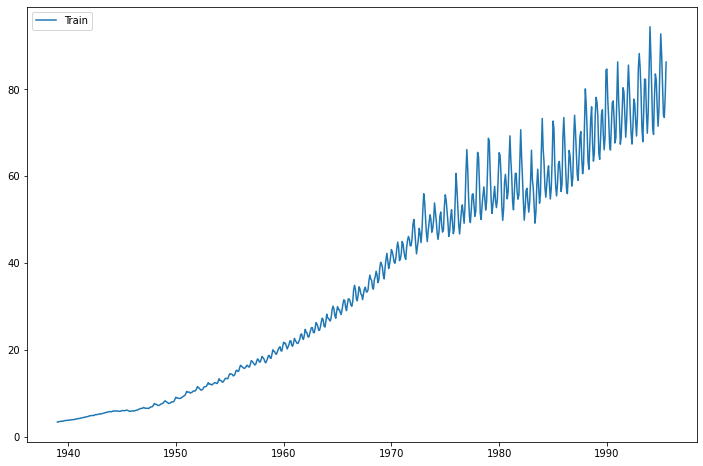

In [56]:
plt.figure(figsize=(12,8))

plt.plot(train_data.index, train_data['ENERGY_INDEX'], label='Train')
plt.legend(loc='best')
plt.show()

In [57]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposed_series = seasonal_decompose(train_data['ENERGY_INDEX'], model='add')

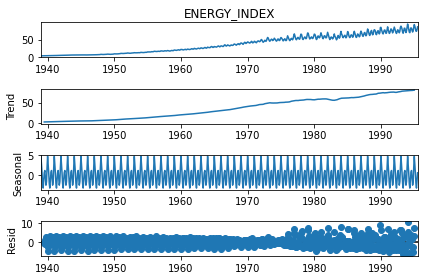

In [58]:
decomposed_series.plot()
plt.show()

In [59]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposed_series = seasonal_decompose(train_data['ENERGY_INDEX'], model='mul')

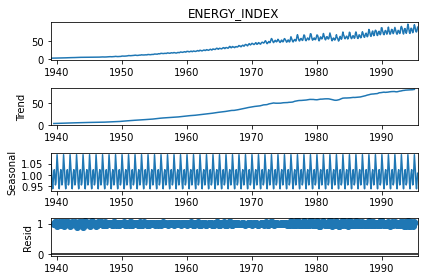

In [60]:
decomposed_series.plot()
plt.show()

- we can observe clear upward trend and seasonality

<AxesSubplot:xlabel='DATE'>

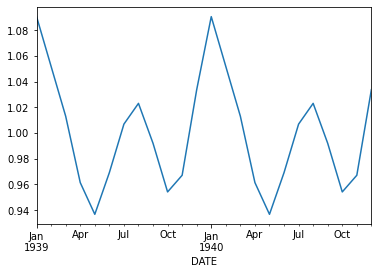

In [61]:
(decomposed_series.seasonal[0:24]).plot()

we can observe Yearly seasonality 

Since there exists an upward trend and an yearly seasonality, we are going for Triple Exponential Smoothing

------

# Holt's Winters (Triple exponential smoothing)

In [62]:
from statsmodels.tsa.api import ExponentialSmoothing

In [63]:
model = ExponentialSmoothing(np.asarray(train_data['ENERGY_INDEX']) ,seasonal_periods=12 ,trend='add', seasonal='add',)
fitmodel = model.fit(smoothing_level=0.999, smoothing_slope=0.01, smoothing_seasonal=0.76)

valid_data['Holt_Winter'] = fitmodel.forecast(len(valid_data)) 

In [64]:
model.params # Model parameters

{'smoothing_level': 0.999,
 'smoothing_trend': 0.01,
 'smoothing_seasonal': 0.76,
 'damping_trend': nan,
 'initial_level': 39.934230495746114,
 'initial_trend': 0.06540893936073228,
 'initial_seasons': array([-36.64209278, -36.79030785, -37.04080832, -37.38631739,
        -37.77851002, -38.03509524, -38.09338686, -37.76017629,
        -37.17397088, -36.71655788, -36.47090727, -36.5080962 ]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [65]:
### preparing Test data
test_data = pd.date_range(start="1995-08-01", end ="2022-09-01", freq='MS')
test_data = test_data.to_frame(name ="DATE")
test_data.index = test_data['DATE'] #set date as index
test_data= test_data.drop("DATE", axis =1)

In [66]:
test_data['Holt_Winter 3 years'] =fitmodel.forecast(len(valid_data) + 36) # forecast of 3 years

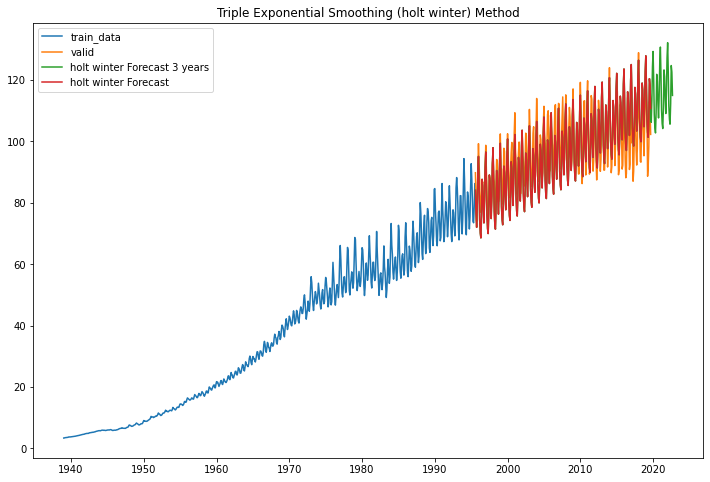

In [67]:
plt.figure(figsize=(12,8))

plt.plot(train_data.index, train_data['ENERGY_INDEX'], label='train_data')
plt.plot(valid_data.index,valid_data['ENERGY_INDEX'], label='valid')
plt.plot(test_data.index,test_data['Holt_Winter 3 years'], label='holt winter Forecast 3 years')
plt.plot(valid_data.index,valid_data['Holt_Winter'], label='holt winter Forecast')


plt.legend(loc='best')
plt.title("Triple Exponential Smoothing (holt winter) Method")
plt.show()

In [68]:
# calculating RMSE 
rmse = sqrt(mean_squared_error(valid_data['ENERGY_INDEX'], valid_data['Holt_Winter']))
print('The RMSE value for Holt Winter Method is', rmse)

The RMSE value for Holt Winter Method is 6.3524724724093815


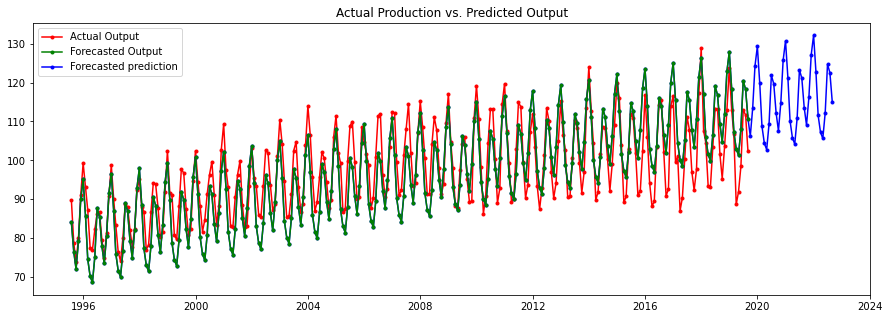

In [69]:
fig = plt.figure(figsize=(15,5));
future, = plt.plot(valid_data.index, valid_data['ENERGY_INDEX'], 'r.-', label='Actual Output');
predicted_three_Year, = plt.plot(test_data.index, test_data['Holt_Winter 3 years'], 'b.-', label='Forecasted prediction');
predicted_future, = plt.plot(valid_data.index, valid_data['Holt_Winter'], 'g.-', label='Forecasted Output');


plt.legend(handles=[future, predicted_future, predicted_three_Year]);
plt.title('Actual Production vs. Predicted Output');

- The RMSE value for Holt Winter Method is 6.3524724724093815

In [70]:
test_data['naive'] =86.2425
test_data['average_complete'] =  36.370478
test_data['average_lastyear'] = 80.362542
test_data['moving_average']= 80
test_data['weighted_moving_average']= 80

In [71]:
test_data["2019-10-01":"2022-09-01"]  # Monthly Energy consumption Forecasting for 3 years

,Holt_Winter 3 years,naive,average_complete,average_lastyear,moving_average,weighted_moving_average
DATE,,,,,,
2019-10-01,106.228793,86.2425,36.370478,80.362542,80,80
2019-11-01,113.390881,86.2425,36.370478,80.362542,80,80
2019-12-01,124.293861,86.2425,36.370478,80.362542,80,80
2020-01-01,129.314791,86.2425,36.370478,80.362542,80,80
2020-02-01,119.801296,86.2425,36.370478,80.362542,80,80
2020-03-01,108.724652,86.2425,36.370478,80.362542,80,80
2020-04-01,104.349560,86.2425,36.370478,80.362542,80,80
2020-05-01,102.770209,86.2425,36.370478,80.362542,80,80
2020-06-01,109.394217,86.2425,36.370478,80.362542,80,80


---------

-------